In [55]:
# Import libraries.
using Turing, StatsPlots, Random, MCMCChains, MCMCDiagnosticTools, Distributions, Optim

In [116]:
mu_true = 0;
sigma_true = 1;

Ndata = 1000;

# real data comes from N(0,1)
data = rand(Normal(mu_true,sigma_true),Ndata);

In [129]:
@model function model1(y)
    # sets the prior for variance of model 1 (can't remember what Jeffreys is)
    s² ~ InverseGamma(2, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # data from standard normal
        y[n] ~ Normal(0, sqrt(s²))
    end
end

model1 (generic function with 2 methods)

In [130]:
@model function model2(y)
    # sets the prior for variance of model 2 (can't remember what Jeffreys is)
    eta ~ InverseGamma(2, 1)
    mu ~ Uniform(-eta,eta)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # data from standard normal
          y[n] ~ Normal(mu, 1)
    end
end

model2 (generic function with 2 methods)

In [131]:
# associate models with data
model1_full = model1(data);
model2_full = model2(data);

In [132]:
chain1 = sample(model1_full,NUTS(.65),1000); 

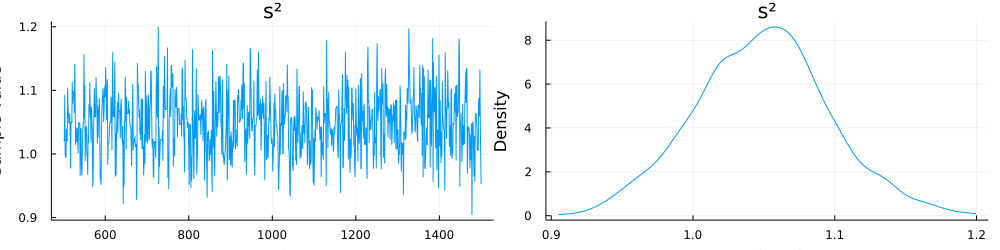

In [133]:
plot(chain1)

In [134]:
chain2 = sample(model2_full,NUTS(.65),1000); 

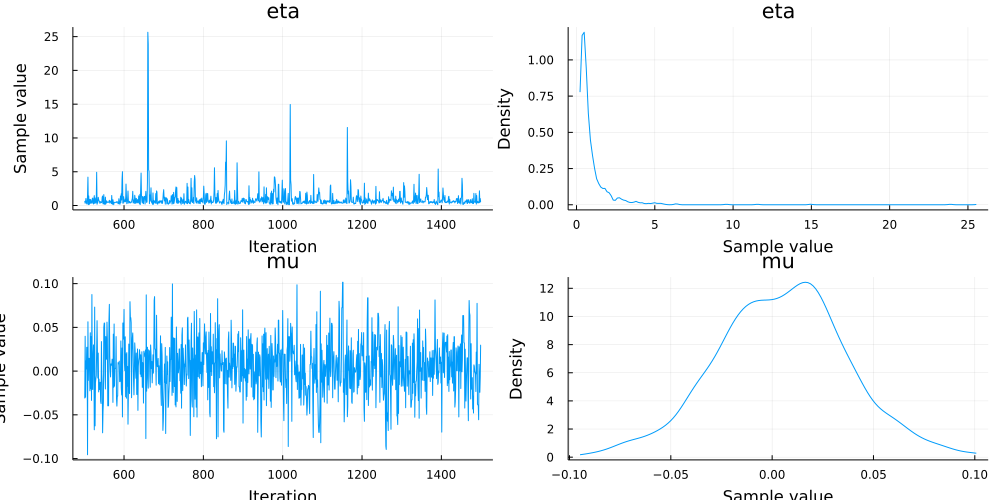

In [135]:
plot(chain2)

In [136]:
mle1_estimate = optimize(model1_full, MLE())


ModeResult with maximized lp of -1442.35
1-element Named Vector{Float64}
A   │ 
────┼────────
:s² │ 1.04794

In [137]:
map1_estimate = optimize(model1_full, MAP())

ModeResult with maximized lp of -1443.44
1-element Named Vector{Float64}
A   │ 
────┼────────
:s² │ 1.04368

In [138]:
mle2_estimate = optimize(model2_full, MLE())


ModeResult with maximized lp of -1442.90
2-element Named Vector{Float64}
A    │ 
─────┼───────────
:eta │   0.640117
:mu  │ 0.00513537

In [139]:
map2_estimate = optimize(model2_full, MAP())

ModeResult with maximized lp of -1442.04
2-element Named Vector{Float64}
A    │ 
─────┼───────────
:eta │       0.25
:mu  │ 0.00513537

In [140]:
# does sampler make any difference?
iterations = 1000
ϵ = 0.05
τ = 10

model2_HMC = sample(model2_full,HMC(ϵ, τ), iterations )

Chains MCMC chain (1000×11×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 1.77 seconds
Compute duration  = 1.77 seconds
parameters        = eta, mu
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         eta    0.8525    1.1096     0.0351    0.0897   150.8471    0.9997     ⋯
          mu    0.0415    0.0928     0.0029    0.0161     6.7843    1.1022     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

         eta    0.1708    0.3630    0.5689    0.9853    2.9339
      

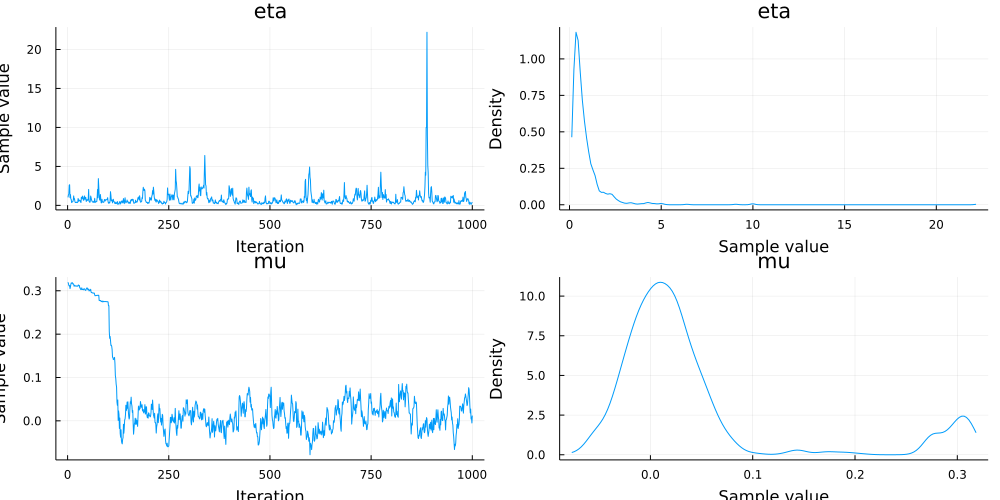

In [141]:
plot(model2_HMC)